# Ordinary Least Squares Regression (Linear Regression)
Linear Regression also known as Ordinary least squares Regression is the most traditional and a very famous algorithm of statistics used in making prediction particularlly for quantitative variables like price,quantity,weight,height,income etc.
This algortihm try to define a relationship between the target variable or dependent variable with regressor or independent variables.
ex:-prediction of height based on the weight data where height is the target variable and weight is the regressor or independent variable.
Here I have given a idea about how this algorithm works and how to optimize the error to get better results using Stochastic gradient decent technique(sgd) from scratch as well as from the scikit-learn SGDRegressor function.

In [120]:
#let' import the boston house prediction dataset from the scikit learn library 
from sklearn import datasets
dataset_boston = datasets.load_boston()
print(dataset_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [121]:
#importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
#converting the dataset into frame using pandas and checking the dimension of dataset
dt_boston=pd.DataFrame(data=dataset_boston.data,columns=dataset_boston.feature_names)
dt_boston.shape

(506, 13)

In [123]:
#checking the keys of the dataset
dataset_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [124]:
#checking the datatypes of variables in the data
dt_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [125]:
#checking the column names of dataset
dt_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [126]:
#checking for null values in data
dt_boston.isnull().sum()
#no null value found

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [127]:
dataset_boston.target.shape #target variable (price)
dt_boston["price"]=dataset_boston.target

In [128]:
dt_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [129]:
dt_boston.describe() #for statistical summary of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [130]:
dt_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [131]:
dt_boston.duplicated().sum()# there a no duplicate records in dataset

0

# Let's try to do some visualization of data to gain insights

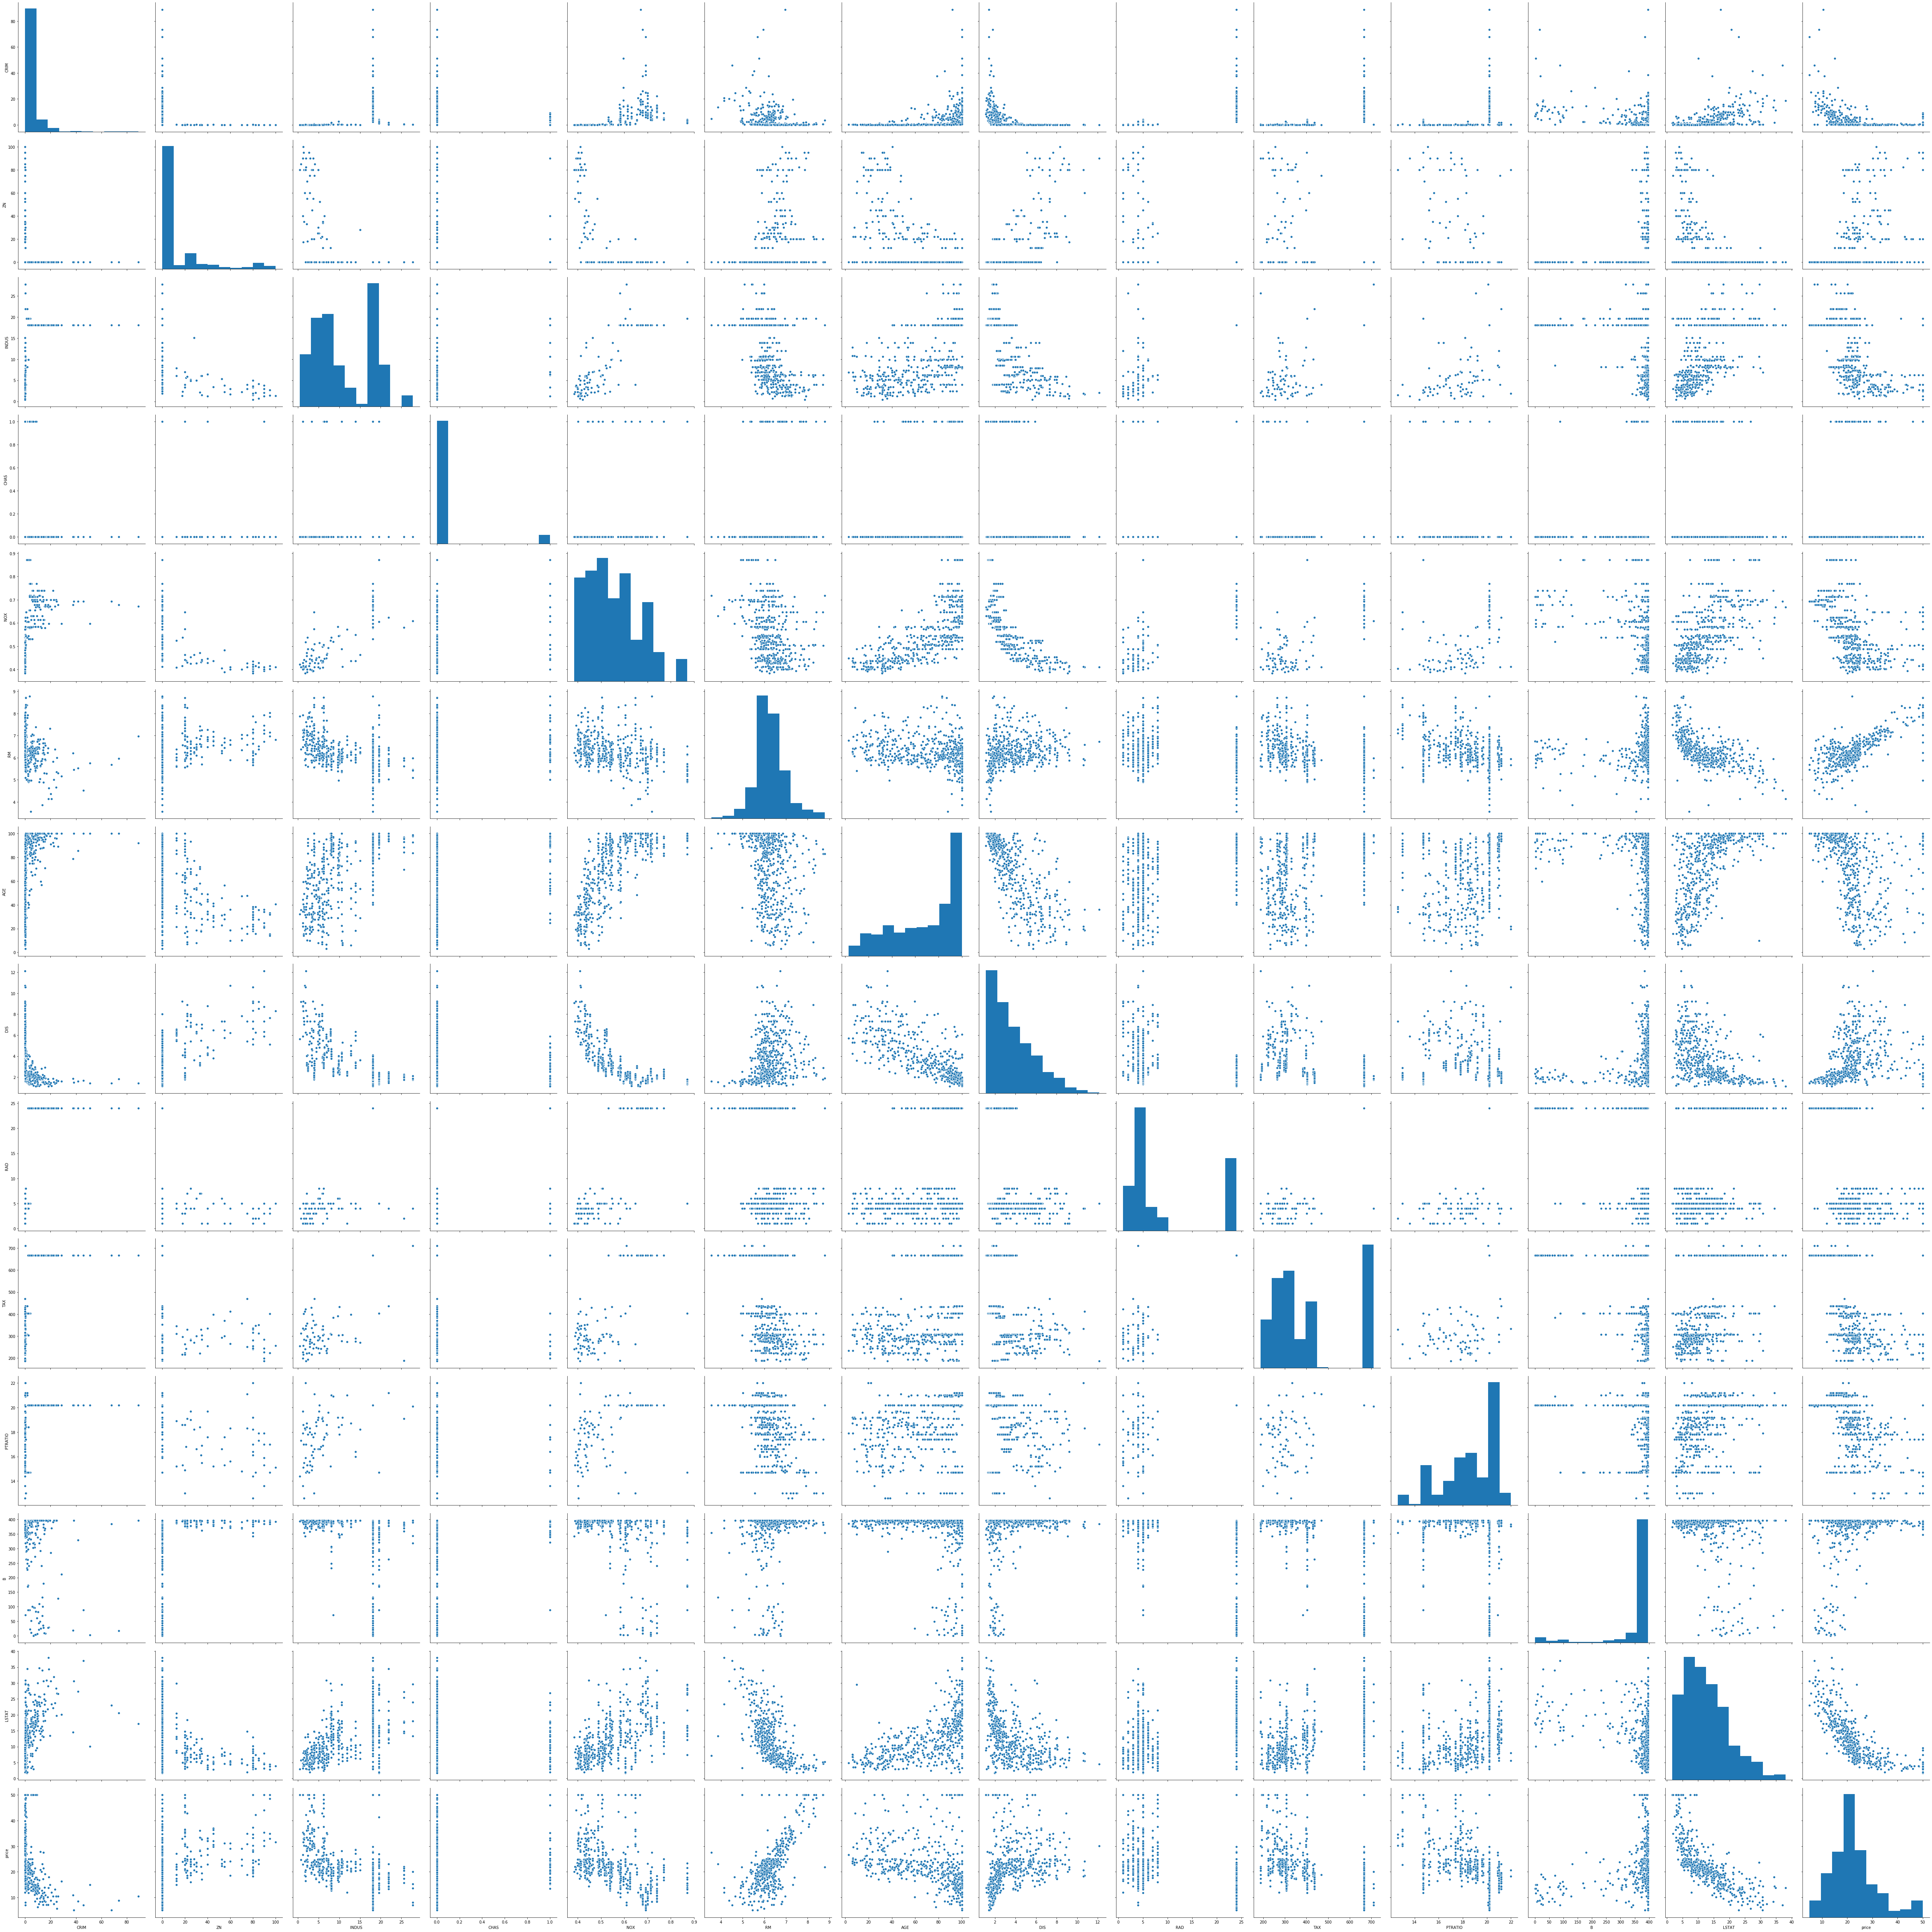

In [132]:
sns.pairplot(dt_boston,height=5)
#this pairplot will give an idea of the relationships among all pair of variables

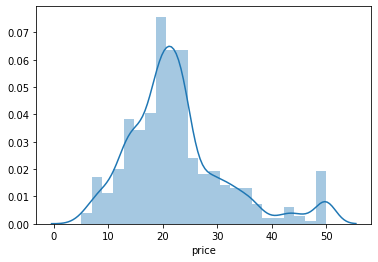

In [133]:
sns.distplot(dt_boston["price"])
#it gives ide about the distribution and shape of data

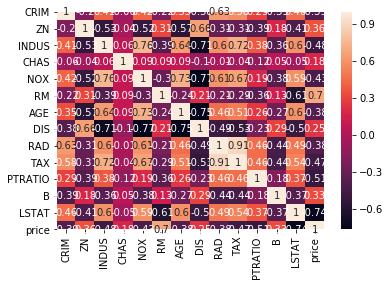

In [134]:
corr=dt_boston.corr().round(2)

sns.heatmap(corr,annot=True)
plt.show()
#notice that we need to choose the features having high correlation with our target feature and there are two variable having high correlation with target variabel
#those are RM and LSTAT ,but as it is linear regression we need to keep the assumptions of this algorithm in mind.
#we should check that whether these variable are not correlated with each other
#because we need to remove multicollinearity and all the features used for prediction should be independent.
#but these variables are highly correlated with each other ,so we need to use only Some of them in model and remove few

In [135]:
sig_feature=abs(corr["price"])
sig_feature=sig_feature[sig_feature>0.4]
print(sig_feature)
print(dt_boston[["INDUS","NOX","RM","TAX", "PTRATIO", "LSTAT"]].corr().round(2))
#we will choose Indus and Tax among NOX ,INDUS AND TAX Because these three are highly corrleated and
#indus and tax have highest correlation with price and we will choos LSTAT AND PTRATIO for the same reason

INDUS      0.48
NOX        0.43
RM         0.70
TAX        0.47
PTRATIO    0.51
LSTAT      0.74
price      1.00
Name: price, dtype: float64
         INDUS   NOX    RM   TAX  PTRATIO  LSTAT
INDUS     1.00  0.76 -0.39  0.72     0.38   0.60
NOX       0.76  1.00 -0.30  0.67     0.19   0.59
RM       -0.39 -0.30  1.00 -0.29    -0.36  -0.61
TAX       0.72  0.67 -0.29  1.00     0.46   0.54
PTRATIO   0.38  0.19 -0.36  0.46     1.00   0.37
LSTAT     0.60  0.59 -0.61  0.54     0.37   1.00


In [136]:
#importing the important models and model selection functions
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [137]:
#spliting data into train and test data with 70:30 ratio
X=dt_boston.iloc[:,1:13]
y=dt_boston["price"]
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.30, random_state=1)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 12)
(152, 12)
(354,)
(152,)


0.7774252929445845


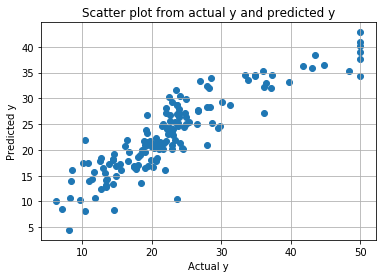

Mean Squared Error : 20.399970616997614


In [139]:
lm=LinearRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)
print(lm.score(X_test,y_test))
plt.scatter(y_test,pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test,pred))
#Notice I have not used any kind of the feature selectiona and feature engineering and simply fitted the model
#I got 77 % accuracy from this model 

# Let's do the feature selection & prerocessing of data

In [274]:
X1=dt_boston[["INDUS","TAX","PTRATIO","LSTAT"]]
y1=dt_boston["price"]

In [275]:
#standardizing data 
def standardize(x):
    """Standardize data set."""
    return (x - x.mean(axis=0))/ x.std(axis=0)
X1=standardize(X1)
y1=standardize(y1)

In [276]:
x_train, x_test, y_train, y_test = train_test_split(
 X1, y1, test_size=0.30, random_state=1)

In [277]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 4)
(152, 4)
(354,)
(152,)


In [278]:
# Now fit the model

0.6012862252895226


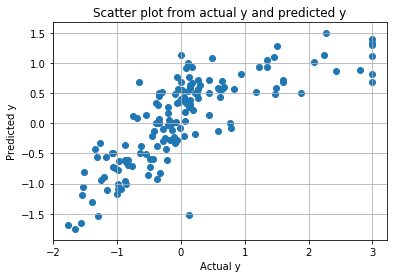

Mean Squared Error : 0.4320288689377872


In [279]:
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print(lm.score(x_test,y_test))
#notice score dropped because we dropped few features but we got more than 60% accuracy with 4 variables
plt.scatter(y_test,pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test,pred))
#score has dropped but mean square error has also dropped significantly

0.6016140173600459


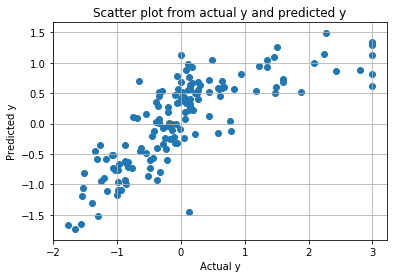

Mean Squared Error : 0.4316736877364912


In [280]:
#let's use sklearn sgdregressor
sgd=SGDRegressor(max_iter=100,alpha=0.01)
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print(sgd.score(x_test,y_test))
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
#notice score has increased compare to the above model and mse has decreased compared to above model

# let's implement gradient decent manually and compare results with sklearn SGDRegressor

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [281]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # ==================================================================
    return J

In [282]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [283]:
alpha = 0.01
num_iters = 100
m=x_train.shape[0]
n=x_train.shape[1]
x_train=np.concatenate([np.ones((m, 1)), x_train], axis=1)
# init theta and run gradient descent
theta = np.zeros(n+1)
theta, J_history = gradientDescentMulti(x_train, y_train, theta, alpha, num_iters)

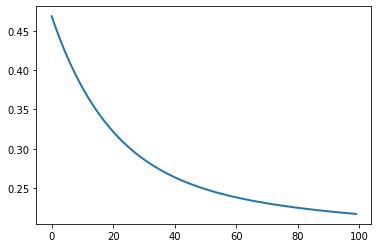

In [284]:
# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
#notice that here as number of iteration increasing cost is decreasing become constant after certain number of iterartions

In [285]:
m=x_test.shape[0]
x_test=np.concatenate([np.ones((m, 1)), x_test], axis=1)

In [286]:
pred=np.dot(x_test, theta)
pred.shape==y_test.shape

True

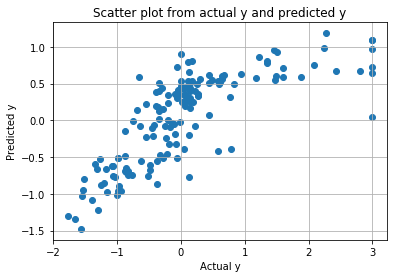

Mean Squared Error : 0.48648389034602646


In [288]:
plt.scatter(y_test,pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test,pred))
#note that the mean square error is more in  the manual gradient decent algorithm 
#however we can reduc it by changing in the parameter alpha(learning rate) and number of iterations.